this script plots profile change across countries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np

In [2]:
filter_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_pf_change.csv'
region_path="../../data/nf_folder/Data/AdditionalData/cntry_region.xlsx"

In [3]:
plot_path="../../data/nf_folder/Figs/profile_change_kl.pdf"

In [4]:
kl_df=pd.read_csv(filter_path)
kl_df.head()

,country,kl
0,Afghanistan,0.014352
1,Albania,0.009265
2,Algeria,0.001746
3,Andorra,0.052331
4,Angola,0.055455


set a threshold at 0.07 and calculate how many countries are influenced

In [5]:
kl_df[kl_df.kl>0.07].shape

(28, 2)

In [6]:
kl_df.loc[kl_df['kl']>=0.07,'kl']=0.07

In [7]:
region_df=pd.read_excel(region_path)[['cntry','region2']]
region_df.head()

,cntry,region2
0,Algeria,Africa
1,Angola,Africa
2,Belgian Congo,Africa
3,Benin,Africa
4,Botswana,Africa


In [8]:
kl_df=kl_df.merge(region_df,left_on='country',right_on='cntry')
kl_df.head()

,country,kl,cntry,region2
0,Afghanistan,0.014352,Afghanistan,Asia
1,Albania,0.009265,Albania,Other Europe
2,Algeria,0.001746,Algeria,Africa
3,Andorra,0.052331,Andorra,Other Europe
4,Angola,0.055455,Angola,Africa


In [29]:
world_geo=gp.read_file("../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp")
world_geo=world_geo[['WoS','Code','geometry']]
world_geo=world_geo[world_geo.WoS!='Antarctica']
world_geo.head(2)

,WoS,Code,geometry
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."


In [62]:
def plot_worldmap(ax, fig, basemap, data, plotcolumn, cmap, vmin, vmax,legend_title):
    """plot a basemap and color the country based on the column passed into
    """

    basemap.plot(ax=ax, linewidth=0.25, edgecolor="#8C8C8C", facecolor="#ffffff")
    data.plot(column=plotcolumn, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax)
    ax.axis("off")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    clb = fig.colorbar(sm, cax=cax)
    clb.ax.set_title(legend_title)

    return fig, ax

In [63]:
kl_df.head()

,country,kl,cntry,region2
0,Afghanistan,0.014352,Afghanistan,Asia
1,Albania,0.009265,Albania,Other Europe
2,Algeria,0.001746,Algeria,Africa
3,Andorra,0.052331,Andorra,Other Europe
4,Angola,0.055455,Angola,Africa


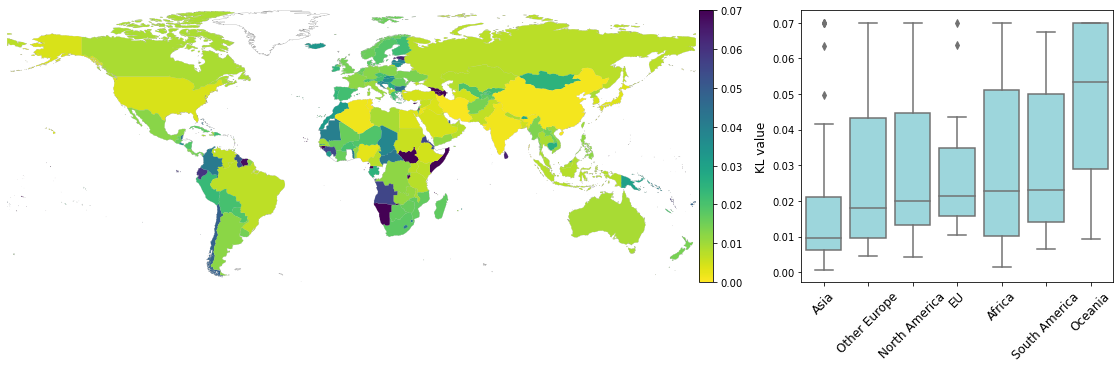

In [73]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [70, 30],'wspace': 0.15},figsize=(20,5))
plot_data=world_geo.merge(kl_df[['country','kl']],left_on='WoS',right_on='country')
plot_data=gp.GeoDataFrame(plot_data)
plot_worldmap(ax[0], fig, world_geo, plot_data, 'kl','viridis_r',0.0,0.07,'')
ax[0].margins(0)

sns.boxplot(x='region2',y='kl',data=kl_df,color='#92DFE6',
            order=['Asia','Other Europe','North America','EU','Africa','South America','Oceania'],ax=ax[1])
ax[1].set_ylabel('KL value',fontsize=12)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['Asia','Other Europe','North America','EU','Africa','South America','Oceania']
                      ,rotation=45,fontsize=12)
plt.savefig(plot_path,bbox_inches='tight')

In [13]:
kl_df[kl_df.region2=='Oceania'].sort_values(by='kl',ascending=False)

,country,kl,cntry,region2
185,Tonga,0.070000,Tonga,Oceania
94,Kiribati,0.070000,Kiribati,Oceania
113,Marshall Islands,0.070000,Marshall Islands,Oceania
124,Nauru,0.070000,Nauru,Oceania
41,Cook Islands,0.070000,Cook Islands,Oceania
133,Niue,0.070000,Niue,Oceania
138,Palau,0.070000,Palau,Oceania
155,Samoa,0.070000,Samoa,Oceania
198,Vanuatu,0.058913,Vanuatu,Oceania
60,Fiji,0.048067,Fiji,Oceania
